In [124]:
#config
srcCsv = "src/jobulizer-TEST.csv"
csvDates = ["ApplyDate","FirstUpdate","LastUpdate"]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num

%matplotlib inline

df = pd.read_csv(srcCsv,parse_dates=csvDates)

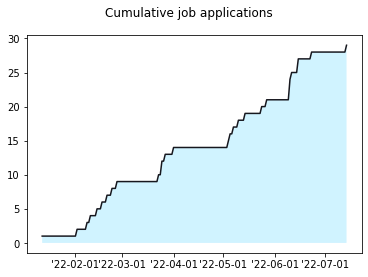

In [125]:
# Graph cumulative all-time applications

# sort by date
df = df.sort_values(by="ApplyDate", ascending=False)

dateMax = date2num(df["ApplyDate"])[0]
dateMin = date2num(df["ApplyDate"])[-1]
duration = int (dateMax - dateMin + 1)

x = np.arange(dateMin, dateMax + 1)
y = np.zeros(duration) # yells at me if I don't cast to int...

for date in df["ApplyDate"]:
    index = int (date2num(date) - dateMin)
    y[index]+= 1
ySum = np.cumsum(y)

fig, ax = plt.subplots()
plt.plot_date(x, ySum, ls='-', ms=0, color='#16171E')
plt.fill_between(x, 0, ySum, facecolor='#D0F3FF')
fig.suptitle("Cumulative job applications")

# also include full months in which first & last applications were sent
months = mdates.MonthLocator(interval=1, bymonthday=1)
dateFmt = mdates.DateFormatter('\'%y-%m-%d')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
plt.show()